In [1]:
#주가예측

In [1]:
import urllib.parse
import pandas as pd

In [2]:
MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}

In [3]:
DOWNLOAD_URL = 'kind.krx.co.kr/corpgeneral/corpList.do'

In [4]:
def download_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:
        params['marketType'] = MARKET_CODE_DICT[market]

    if not delisted:
        params['searchType'] = 13

    params_string = urllib.parse.urlencode(params)
    request_url = urllib.parse.urlunsplit(['http', DOWNLOAD_URL, '', params_string, ''])

    df = pd.read_html(request_url, header=0)[0]
    df.종목코드 = df.종목코드.map('{:06d}'.format)

    return df


kosdaq_stocks = download_stock_codes('kospi')
kosdaq_stocks.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DRB동일,004840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
1,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
2,GS글로벌,001250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"권순호, 정경구",http://www.hdc-dvp.com,서울특별시
4,KEC,092220,반도체 제조업,반도체 제조,2006-10-16,12월,박남규 김학남,http://www.kec.co.kr,서울특별시


In [5]:
pip install finance-datareader 

Note: you may need to restart the kernel to use updated packages.


In [7]:
stock = input("Enter a stock_name: ")

Enter a stock_name:  대한항공


In [8]:

stock_codeDF = kosdaq_stocks[ (kosdaq_stocks.회사명==stock) ][['회사명','종목코드']]
stock_codeDF

,회사명,종목코드
632,대한항공,003490


In [9]:
stock_code = stock_codeDF.iloc[0]['종목코드']
stock_name = stock_codeDF.iloc[0]['회사명']
print(stock_name)
print(stock_code)


대한항공
003490


Populating the interactive namespace from numpy and matplotlib


C:\Users\pc27\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


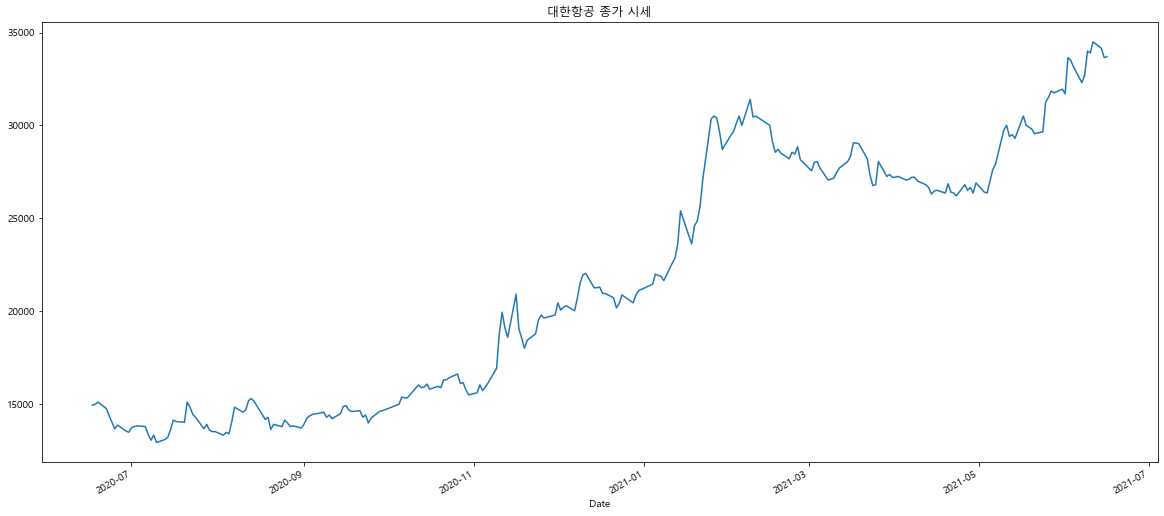

chart ok


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-06-10,34400,35100,33700,33900,6990599,-0.002941
2021-06-11,34050,34700,33850,34500,3322141,0.017699
2021-06-14,34650,34700,33900,34150,3095574,-0.010145
2021-06-15,34150,34150,33300,33650,3347850,-0.014641
2021-06-16,33500,33950,33300,33700,2029146,0.001486


In [50]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 9) 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

end = date.today()
start = date.today() - timedelta(365)

SEC = web.DataReader(stock_code, start, end)
SEC['Close'].plot(style='-')
plt.title(stock_name+" 종가 시세")
plt.show()

print("chart ok")
SEC.tail()

In [51]:
import numpy as np
#이동평균 계산하기
SEC["20days"] = np.round(SEC["Close"].rolling(window = 20, center = False).mean(), 2) #한달동안의 이동평균(주말빼고)
SEC["60days"] = np.round(SEC["Close"].rolling(window = 70, center = False).mean(), 2) #세달동안의 이동평균


In [52]:
SEC.head(100)

,Open,High,Low,Close,Volume,Change,20days,60days
Date,,,,,,,,
2020-06-17,15120,15275,14848,14926,823177,-0.025336,NaN,NaN
2020-06-18,14926,15197,14732,14965,755779,0.002613,NaN,NaN
2020-06-19,15081,15081,14732,15081,856401,0.007751,NaN,NaN
2020-06-22,14926,14926,14732,14732,752269,-0.023142,NaN,NaN
2020-06-23,14810,14810,14344,14345,1343332,-0.026269,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-11-04,16205,16205,15585,15702,1497490,-0.019360,15914.9,14728.03
2020-11-05,15740,15934,15701,15896,1169872,0.012355,15944.0,14749.09
2020-11-06,16244,16399,16011,16128,1898477,0.014595,15984.7,14775.67


In [53]:
SEC['20days-60days'] = SEC['20days'] - SEC['60days']
SEC

,Open,High,Low,Close,Volume,Change,20days,60days,20days-60days
Date,,,,,,,,,
2020-06-17,15120,15275,14848,14926,823177,-0.025336,NaN,NaN,NaN
2020-06-18,14926,15197,14732,14965,755779,0.002613,NaN,NaN,NaN
2020-06-19,15081,15081,14732,15081,856401,0.007751,NaN,NaN,NaN
2020-06-22,14926,14926,14732,14732,752269,-0.023142,NaN,NaN,NaN
2020-06-23,14810,14810,14344,14345,1343332,-0.026269,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-06-10,34400,35100,33700,33900,6990599,-0.002941,31575.0,28565.00,3010.00
2021-06-11,34050,34700,33850,34500,3322141,0.017699,31825.0,28657.86,3167.14
2021-06-14,34650,34700,33900,34150,3095574,-0.010145,32067.5,28745.00,3322.50


In [61]:
#최근 2주이동평균-10주이동평균이 양수면 상승 -> 상승하면 GOLDEN CROSS, 하락하면 DEAD CROSS
SEC["Regime"] = np.where(SEC['20days-60days'] > 0, "GOLDEN-CROSS", "DEAD-CROSS")
SEC

,Open,High,Low,Close,Volume,Change,20days,60days,20days-60days,Regime,SHOULD I SELL THIS STOCK
Date,,,,,,,,,,,
2020-06-17,15120,15275,14848,14926,823177,-0.025336,NaN,NaN,NaN,DEAD-CROSS,SELL IT
2020-06-18,14926,15197,14732,14965,755779,0.002613,NaN,NaN,NaN,DEAD-CROSS,SELL IT
2020-06-19,15081,15081,14732,15081,856401,0.007751,NaN,NaN,NaN,DEAD-CROSS,SELL IT
2020-06-22,14926,14926,14732,14732,752269,-0.023142,NaN,NaN,NaN,DEAD-CROSS,SELL IT
2020-06-23,14810,14810,14344,14345,1343332,-0.026269,NaN,NaN,NaN,DEAD-CROSS,SELL IT
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-10,34400,35100,33700,33900,6990599,-0.002941,31575.0,28565.00,3010.00,GOLDEN-CROSS,KEEP IT
2021-06-11,34050,34700,33850,34500,3322141,0.017699,31825.0,28657.86,3167.14,GOLDEN-CROSS,KEEP IT
2021-06-14,34650,34700,33900,34150,3095574,-0.010145,32067.5,28745.00,3322.50,GOLDEN-CROSS,KEEP IT


In [62]:
SEC["SHOULD I SELL THIS STOCK"] = np.where(SEC['Regime']== "DEAD-CROSS", "SELL IT", "KEEP IT")

In [63]:
SEC

,Open,High,Low,Close,Volume,Change,20days,60days,20days-60days,Regime,SHOULD I SELL THIS STOCK
Date,,,,,,,,,,,
2020-06-17,15120,15275,14848,14926,823177,-0.025336,NaN,NaN,NaN,DEAD-CROSS,SELL IT
2020-06-18,14926,15197,14732,14965,755779,0.002613,NaN,NaN,NaN,DEAD-CROSS,SELL IT
2020-06-19,15081,15081,14732,15081,856401,0.007751,NaN,NaN,NaN,DEAD-CROSS,SELL IT
2020-06-22,14926,14926,14732,14732,752269,-0.023142,NaN,NaN,NaN,DEAD-CROSS,SELL IT
2020-06-23,14810,14810,14344,14345,1343332,-0.026269,NaN,NaN,NaN,DEAD-CROSS,SELL IT
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-10,34400,35100,33700,33900,6990599,-0.002941,31575.0,28565.00,3010.00,GOLDEN-CROSS,KEEP IT
2021-06-11,34050,34700,33850,34500,3322141,0.017699,31825.0,28657.86,3167.14,GOLDEN-CROSS,KEEP IT
2021-06-14,34650,34700,33900,34150,3095574,-0.010145,32067.5,28745.00,3322.50,GOLDEN-CROSS,KEEP IT
